## Clustering and Decision Trees

### Dataset: Iris

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

Predicted attribute: class of iris plant. 

Attribute Information:

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
 - Iris Setosa 
 - Iris Versicolour 
 - Iris Virginica
 
### Tasks

- Explore clustering algorithms on the Iris dataset
- Fit a decision tree on the Iris dataset

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data exploration

In [25]:
from sklearn.datasets import load_iris

In [26]:
# explore data, plot features

iris = load_iris()

print(iris.feature_names)
print(iris.data) # get feature values

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3

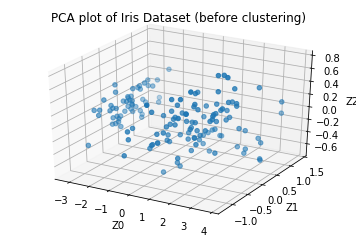

In [27]:
# plot the data in 3D
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3) # reduce to 3 dimensions to plot

X = iris.data
pca.fit(X)
Z = pca.transform(X)

# plot Z in scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2])
ax.set_title("PCA plot of Iris Dataset (before clustering)")
ax.set(xlabel='Z0', ylabel='Z1', zlabel='Z2')
plt.show()

## Clustering

At this point, the features can be clustered. We'll try:

- K-means, including finding best k using elbow plot
- Hierarchical clustering

### K-means and Elbow plot

In [28]:
# KMeans
from sklearn.cluster import KMeans

# n_init=5 means run KMeans 5 times with different centroid seeds
#
# for n in n_init:
#   run_kmeans (randomly select random seed)
#
# find best n_init
#
# (more stable result)
kmeans = KMeans(n_clusters=3, n_init=5)
clusters = kmeans.fit_predict(X) # cluster on all 4 features (X)

print('centroids', kmeans.cluster_centers_)

centroids [[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [29]:
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [30]:
import pandas as pd
from sklearn.metrics import homogeneity_completeness_v_measure

df = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters),
                pd.DataFrame(iris.target)],
               axis=1)

homogeneity_completeness_v_measure(iris.target, clusters)

(0.7514854021988338, 0.7649861514489815, 0.7581756800057784)

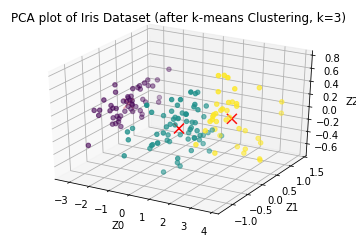

In [31]:
# transform centroids from 4d to 3d
Z_centroids = pca.transform(kmeans.cluster_centers_)

# plot Z and centroids in scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# colour the points based on cluster value
ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], c=clusters)
# traditional way:
# for i in range(3):
#    ax.scatter(Z[clusters==i, 0], Z[clusters==i, 1], Z[clusters==i, 2])
#
ax.scatter(Z_centroids[:, 0], Z_centroids[:, 1], Z_centroids[:, 2],
           marker='x', s=100, color='red') # use size 100 marker

ax.set_title("PCA plot of Iris Dataset (after k-means Clustering, k=3)")
ax.set(xlabel='Z0', ylabel='Z1', zlabel='Z2')

plt.show()

In [32]:
# K-means: how it works

# 1. pick k (k=3)
# 2. randomly initialise k centroids from samples (pick k samples)
#
# Repeat N times:
# 3. for each sample
#       for each centroid
#           compute distance between (centroid - sample)
#       assign closest centroid's cluster to sample
# 4. update centroids by finding mean of member samples
#
import numpy as np
np.random.seed(0)

def vanilla_kmeans(X, n_clusters, max_iters=5):
    # randomly initialize centroids
    centroid_idxes = np.random.choice(np.arange(len(X)), n_clusters)
    print('seeding centroids at indices', centroid_idxes)

    centroids = X[centroid_idxes, :]
    print('initial centroids', centroids)
    
    for i in range(max_iters):
        # assign clusters based on centroids
        C = []
        for x in X:
            distances = []
            for c in centroids:
                # sum of squared distances
                distances.append(np.dot(x - c, x - c))

            # find the cluster with the smallest distance
            C.append(np.argmin(distances))
    
        C = np.array(C)
        # update centroids
        for k in range(n_clusters):
            centroids[k] = X[C == k, :].mean(axis=0)
                                
    print('centroids after %d iterations' % max_iters, centroids)
    return centroids, C

vanilla_kmeans(X, 3)    

seeding centroids at indices [ 47 117  67]
initial centroids [[4.6 3.2 1.4 0.2]
 [7.7 3.8 6.7 2.2]
 [5.8 2.7 4.1 1. ]]
centroids after 5 iterations [[5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


(array([[5.006     , 3.428     , 1.462     , 0.246     ],
        [6.85      , 3.07368421, 5.74210526, 2.07105263],
        [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
        1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
        1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int64))

seeding centroids at indices [103   9  21]
initial centroids [[6.3 2.9 5.6 1.8]
 [4.9 3.1 1.5 0.1]
 [5.1 3.7 1.5 0.4]]
centroids after 1 iterations [[6.31458333 2.89583333 4.97395833 1.703125  ]
 [4.76538462 2.98846154 1.71923077 0.32692308]
 [5.22857143 3.675      1.48214286 0.28214286]]
seeding centroids at indices [36 87 70]
initial centroids [[5.5 3.5 1.3 0.2]
 [6.3 2.3 4.4 1.3]
 [5.9 3.2 4.8 1.8]]
centroids after 4 iterations [[5.006      3.428      1.462      0.246     ]
 [5.79361702 2.71914894 4.2212766  1.34255319]
 [6.67735849 3.00754717 5.51320755 1.97169811]]


Text(0.5,0.92,'KMeans, iteration 4')

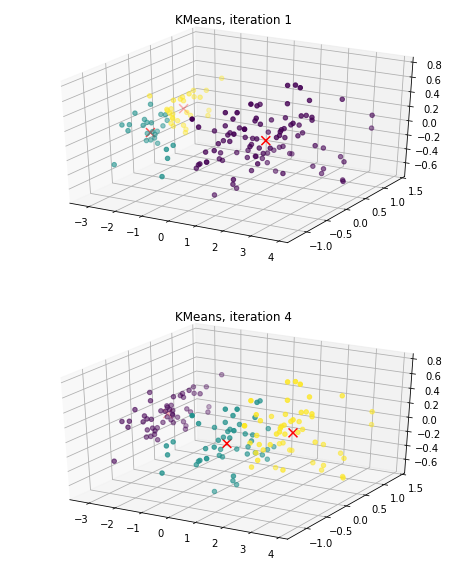

In [33]:
fig = plt.figure(figsize=(8, 10))

# iteration 1
ax = fig.add_subplot(211, projection='3d')
centroids, clusters = vanilla_kmeans(X, 3, max_iters=1)
Z_centroids = pca.transform(centroids)

ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], c=clusters)
ax.scatter(Z_centroids[:, 0], Z_centroids[:, 1], Z_centroids[:, 2], s=80, marker='x', color='red')
ax.set_title('KMeans, iteration 1')

# iteration 4
ax = fig.add_subplot(212, projection='3d')
centroids, clusters = vanilla_kmeans(X, 3, max_iters=4)
Z_centroids = pca.transform(centroids)

ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], c=clusters)
ax.scatter(Z_centroids[:, 0], Z_centroids[:, 1], Z_centroids[:, 2], s=80, marker='x', color='red')
ax.set_title('KMeans, iteration 4')

In [34]:
# Elbow plot

# for k in num_clusters:
#    run kmeans(k)
#    compute cost
#
# plot to find elbow (hopefully)

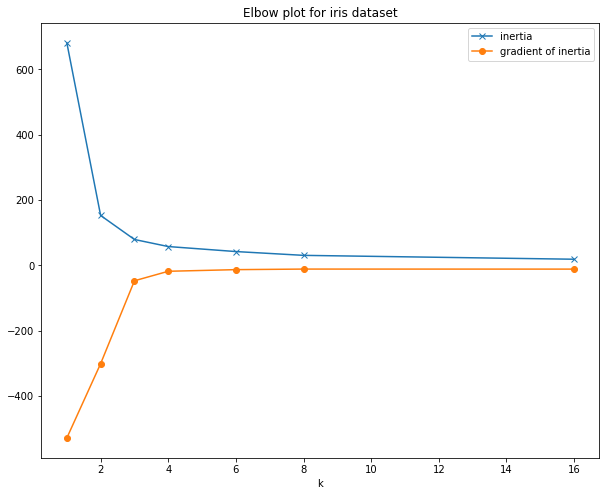

[681.3706, 152.34795176035792, 78.85144142614601, 57.228473214285714, 41.88713805668016, 30.254402675826597, 18.399378920786816]


In [35]:
%matplotlib inline
ks = [1, 2, 3, 4, 6, 8, 16]
cost = []
difference = []

for k in ks:
    kmeans = KMeans(n_clusters=k, n_init=5)
    kmeans.fit(X)
    cost.append(kmeans.inertia_) # sum of squared distances to centroid

# plot k vs cost
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(ks, cost, marker='x', label='inertia')
ax.plot(ks, np.gradient(cost), marker='o', label='gradient of inertia')
ax.set_title('Elbow plot for iris dataset')
ax.set_xlabel('k')
ax.legend()
plt.show()

print(cost)

### Hierarchical Clustering

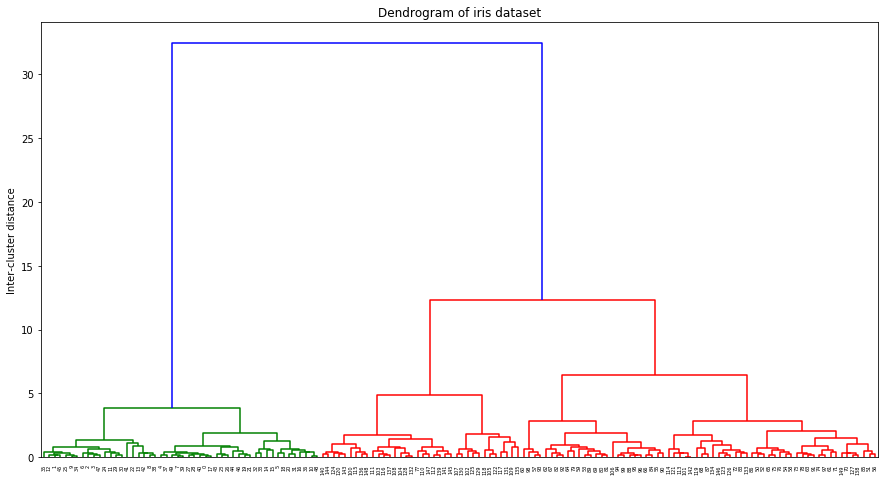

In [36]:
# Hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

links = linkage(X, 'ward')
fig, ax = plt.subplots(figsize=(15, 8))
dendrogram(links, ax=ax)
ax.set_title('Dendrogram of iris dataset')
ax.set_ylabel('Inter-cluster distance')
plt.show() 

In [37]:
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters=3)
clusters = ag.fit_predict(X)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

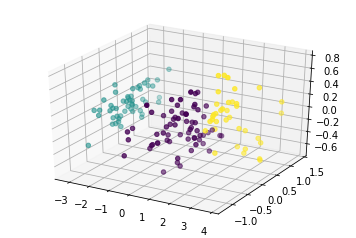

In [38]:
# plot Z and clusters in scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# colour the points based on cluster value
ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], c=clusters)

plt.show()

In [39]:
# Evaluation metrics to compare algorithms
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, n_init=5)
cluster_kmeans = kmeans.fit_predict(X)
print('Kmeans', silhouette_score(X, cluster_kmeans))
print(cluster_kmeans)

ag = AgglomerativeClustering(n_clusters=3)
cluster_ag = ag.fit_predict(X)
print('Hierarchical', silhouette_score(X, cluster_ag))
print(cluster_ag)

Kmeans 0.5528190123564091
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
Hierarchical 0.5543236611296415
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


### Exploring the clusters

Let's explore the clusters using scatter matrix to see if we discover patterns.

In [43]:
df_kmeans = pd.concat([pd.DataFrame(X, columns=['sepal length (cm)', 'sepal width (cm)',
                                                'petal length (cm)', 'petal width (cm)']),
                       pd.DataFrame(cluster_kmeans, columns=['cluster_id'])], axis=1)


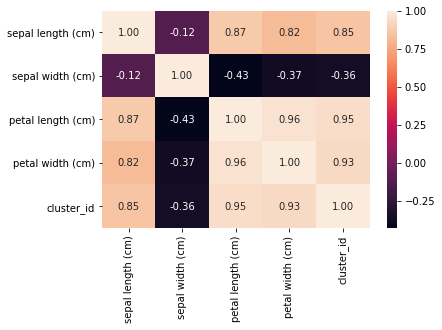

In [45]:
fig, ax = plt.subplots()
sns.heatmap(df_kmeans.corr(), annot=True, fmt='.2f', ax=ax)

C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invali

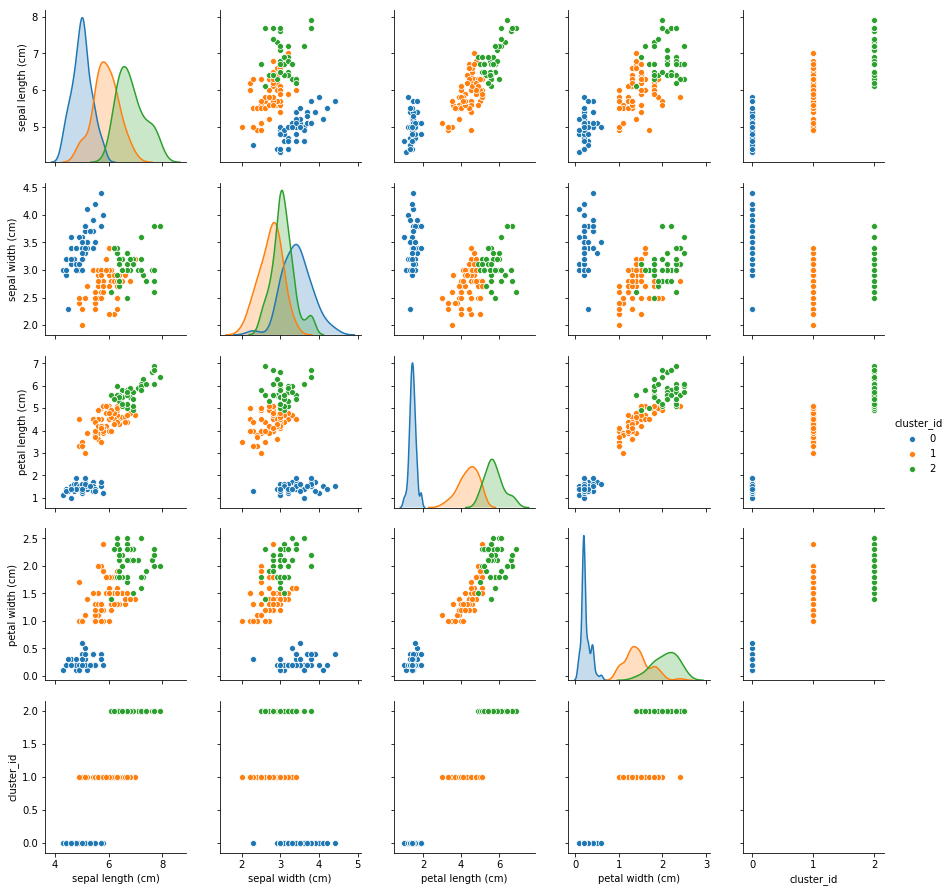

In [46]:
sns.pairplot(df_kmeans, hue="cluster_id")

In [ ]:
# Repeat the same with agc (cluster_ag)
# Try different ks to see the distribution of features across k

## Decision Tree

In [48]:
X = iris.data
y = iris.target

In [65]:
# check for imbalance (important for a Decision Tree)
pd.Series(y).value_counts()

2    50
1    50
0    50
dtype: int64

No imbalance, go ahead and train a decision tree classifier

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [50]:
from sklearn.tree import DecisionTreeClassifier

dtc_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3)

dtc_entropy.fit(X_train, y_train)
dtc_entropy.score(X_test, y_test) # mean accuracy

0.9736842105263158

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        12

   micro avg       0.97      0.97      0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



[Text(33,0.5,'Truth'), Text(0.5,15,'Predicted')]

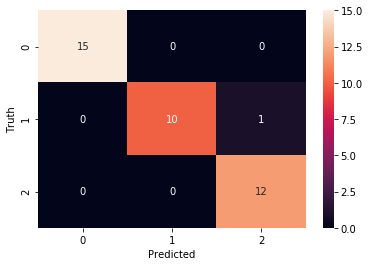

In [55]:
# Apply classification metrics
from sklearn.metrics import classification_report, confusion_matrix

y_pred = dtc_entropy.predict(X_test)

print(classification_report(y_test, y_pred))

ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
ax.set(xlabel='Predicted', ylabel='Truth')

In [52]:
# Visualise the decision tree

# conda install python-graphviz
from sklearn.tree import export_graphviz
import graphviz

In [66]:
# to run this cell multiple times, need to close the pdf file first
filename = 'dtc_iris_entropy.dot'
export_graphviz(dtc_entropy,
                out_file=filename,
                feature_names=iris.feature_names,
                class_names=iris.target_names, filled=True,
                rounded=True)

source = graphviz.Source.from_file(filename)
source.render(view=True)

'dtc_iris_entropy.dot.pdf'

### Applying clusters to Supervised Learning

Train a decision tree using any set of clusters from earlier workshop.

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, cluster_kmeans, random_state=42)

In [68]:
dtc_entropy_kmeans = DecisionTreeClassifier(criterion='entropy', max_depth=3)

dtc_entropy_kmeans.fit(X_train, y_train)
dtc_entropy_kmeans.score(X_test, y_test) # mean accuracy

0.9473684210526315

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.87      1.00      0.93        13
           2       1.00      0.80      0.89        10

   micro avg       0.95      0.95      0.95        38
   macro avg       0.96      0.93      0.94        38
weighted avg       0.95      0.95      0.95        38



[Text(33,0.5,'Truth'), Text(0.5,15,'Predicted')]

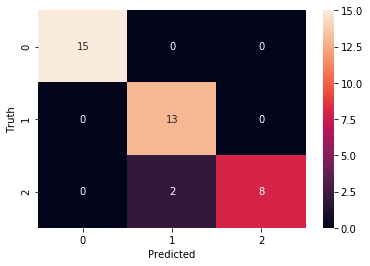

In [69]:
y_pred = dtc_entropy_kmeans.predict(X_test)

print(classification_report(y_test, y_pred))

ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
ax.set(xlabel='Predicted', ylabel='Truth')

In [70]:
# to run this cell multiple times, need to close the pdf file first
filename = 'dtc_iris_entropy_kmeans.dot'
export_graphviz(dtc_entropy_kmeans,
                out_file=filename,
                feature_names=iris.feature_names, filled=True,
                rounded=True)

source = graphviz.Source.from_file(filename)
source.render(view=True)

'dtc_iris_entropy_kmeans.dot.pdf'

### Deployment and Predictions

Inventory (what's needed for prediction):
1. Model

In [61]:
# save model for later use
import pickle

pickle.dump(dtc_entropy, open('03_iris_dtc.pickle', 'wb'))

In [62]:
# load model in deployment
from sklearn.metrics import accuracy_score

dtc1 = pickle.load(open('03_iris_dtc.pickle', 'rb'))

# imagine we have test data
test_data = X_test[:20]
test_targets = y_test[:20]

y_test_pred = dtc1.predict(test_data)

print('Truth', test_targets)
print('Predictions', y_test_pred.flatten())
print('Accuracy', accuracy_score(test_targets, y_test_pred))

Truth [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2]
Predictions [1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2]
Accuracy 0.95
